# Project 2 - Online Shoppers Purchasing Intention

Online Shopping  is a tremendous and developing type of buying.So far, 69% of Americans have shopped online, and 25% of Americans shop online at least once per month(https://optinmonster.com/online-shopping-statistics/).
The "Online Shoppers Purchasing Intention" Dataset is composed of 10 numerical variables and 7 categorical. The following project will be composed of EDA to understand the comportment of each variables, clustering methods that will create grouping of similar data observations and SVM models to predict the most likely categorization of any previously unseen data item.
All of this work could help online retailers to understand  customer/visitors of their websites behavior insights and expand their revenue.

In [50]:
import pandas as pd 

In [51]:
df=pd.read_csv('https://raw.githubusercontent.com/sarahbismuth/p2_data1/master/Project2_Data.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.000000,0,0.000000,8,222.000000,0.000000,0.028571,53.474571,0.0,May,1,1,1,2,New_Visitor,True
1,0,0.000000,0,0.000000,14,1037.500000,0.014286,0.047619,0.000000,0.0,Mar,2,2,4,2,Returning_Visitor,False
2,4,37.500000,2,82.000000,4,96.625000,0.000000,0.017500,0.000000,0.0,Nov,2,2,9,2,New_Visitor,False
3,4,115.700000,0,0.000000,16,655.383333,0.000000,0.012037,0.000000,0.0,Nov,1,1,2,3,Returning_Visitor,False
4,1,60.000000,1,15.000000,26,670.166667,0.000000,0.003846,0.000000,0.0,May,2,2,3,4,Returning_Visitor,False
5,4,44.000000,0,0.000000,90,6951.972222,0.002151,0.015013,0.000000,0.0,Feb,4,1,1,3,Returning_Visitor,False
6,9,294.658788,2,97.640000,107,3173.210417,0.003139,0.009122,5.866249,0.0,June,1,1,1,2,Returning_Visitor,False
7,1,0.000000,0,0.000000,20,2270.833333,0.000000,0.023810,10.231873,0.0,Mar,2,2,3,6,Returning_Visitor,False
8,3,13.000000,0,0.000000,7,79.500000,0.000000,0.020000,0.000000,0.0,Mar,2,2,1,8,New_Visitor,True
9,7,374.369048,0,0.000000,5,258.083333,0.004545,0.052525,0.000000,0.0,May,3,2,3,1,Returning_Visitor,False


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
dtypes: bool(1), float64(7), int64(7), object(2)
memory usag

# Description of the variables 

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration": represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

Administrative:This is the number of pages of this type (administrative) that the user visited.

Administrative Duration:This is the amount of time spent in this category of pages.

Informational:his is the number of informational  pages  that the user visited.

Informational Duration:This is the amount of time spent in this category of pages.

Product Related:this is the number of pages of this type (product related) that the user visited.

Product Related Duration:this is the amount of time spent in this category of pages.


The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.


The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

Bounce rates can be used to help determine the effectiveness or performance of an entry page at generating the interest of visitors. An entry page with a low bounce rate means that the page effectively causes visitors to view more pages and continue deeper into the web site.
High bounce rates typically indicate that the website is not doing a good job of attracting the continued interest of visitors. That means visitors only view single pages without looking at others or taking some form of action within the site before a specified time period.(https://en.wikipedia.org/wiki/Bounce_rate)

The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


# Domain knowledge

Bounce rate: The average bounce rate for ecommerce and retail store is 20-45%  (https://www.growcode.com/blog/bounce-rate-ecommerce-metric/#:~:text=Most%20websites%20have%20bounce%20rates,alarm%20depending%20on%20the%20website)

Exit rate:there is no good or bad numbers it depends on the context. For an ecommerce website, a high exit rate on a thank-you page isn’t something to worry about, because people have completed their action successfully and there’s little left for them to do but leave. However, a high exit rate on the last step of a checkout process (for example: a payment page) could be a sign that something is wrong and needs investigating.(https://www.hotjar.com/google-analytics/glossary/exits/)

Page value:The Page Value metric is designed to help answer the question –“How much is a web page worth?”, thus we want a high value 
If you see an exorbitantly high Page Value, either something you're doing is working or you are looking at false positive.
Pages that have low value represent a chance to make improvements. Your content on low-value pages may not be optimized. Or you may not have enabled any goals associated with the content on your pages.
(https://www.datadrivenu.com/page-value-google-analytics/)

Special day:https://www.thefactsite.com/tag/days-of-the-year/



# EDA

In [53]:
import matplotlib. pyplot as plt
import seaborn as sns

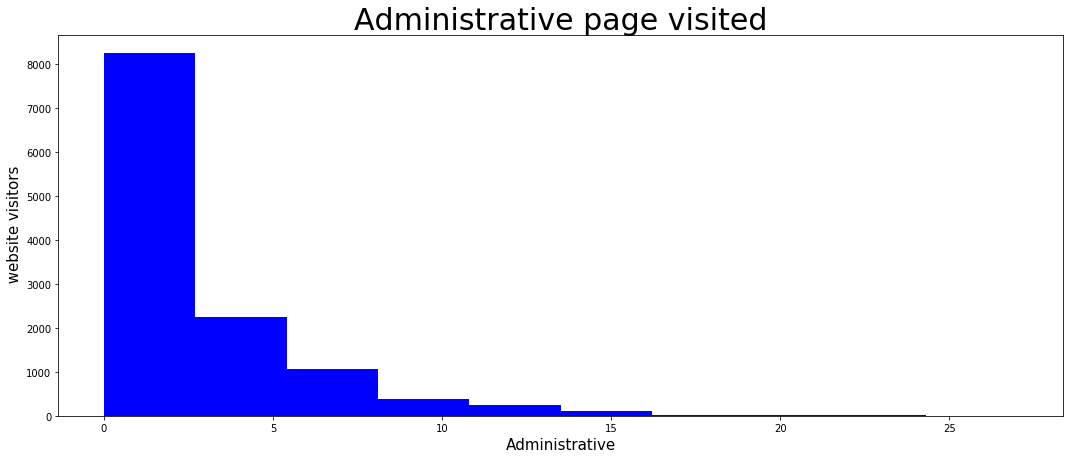

In [54]:
#histogram of Administrative variable 
plt.hist(df['Administrative'], color = 'blue')
plt.title('Administrative page visited',fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel(' website visitors', fontsize = 15)

plt.show()

We can see that  most of the visitors of the websites visited less that 3 administrative pages (since the pic seems to be between 0 and 3).We can only notice that the greater the number of administrative pages the fewer the number of visitors 

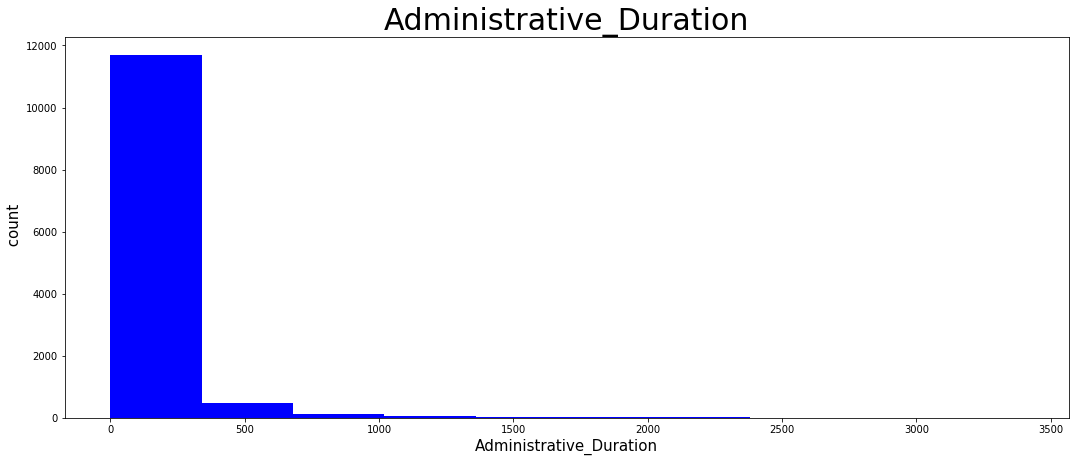

In [55]:
#Distribution of Administrative_Duration
plt.hist(df['Administrative_Duration'], color = 'blue')
plt.title('Administrative_Duration',fontsize = 30)
plt.xlabel('Administrative_Duration', fontsize = 15)
plt.ylabel(' count', fontsize = 15)

plt.show()

Looking at the histogram the  in general the duration is between 0 and 250.

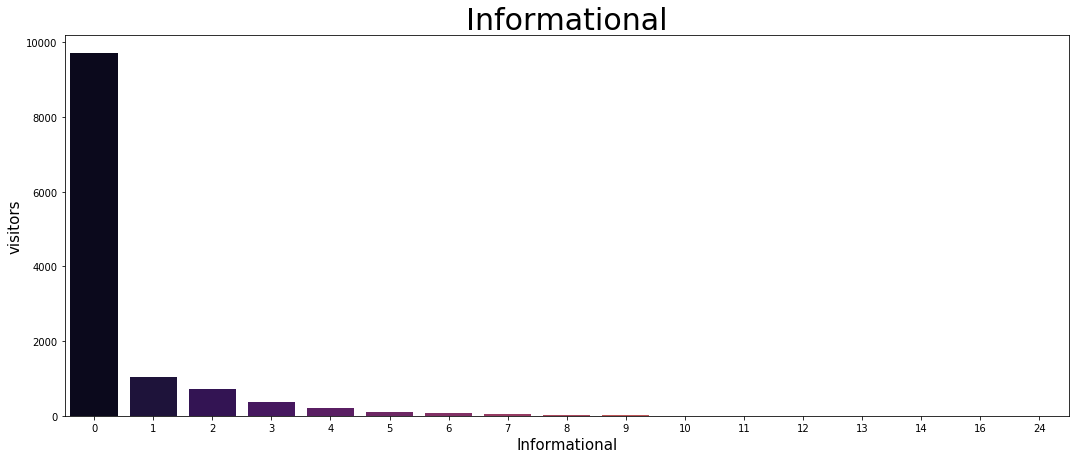

In [56]:
#barplot of Informational variable 
sns.countplot(df['Informational'], palette = 'inferno')
plt.title('Informational', fontsize = 30)
plt.xlabel('Informational', fontsize = 15)
plt.ylabel('visitors', fontsize = 15)

plt.show()

We can see that most of the people  visited 0  informational pages .

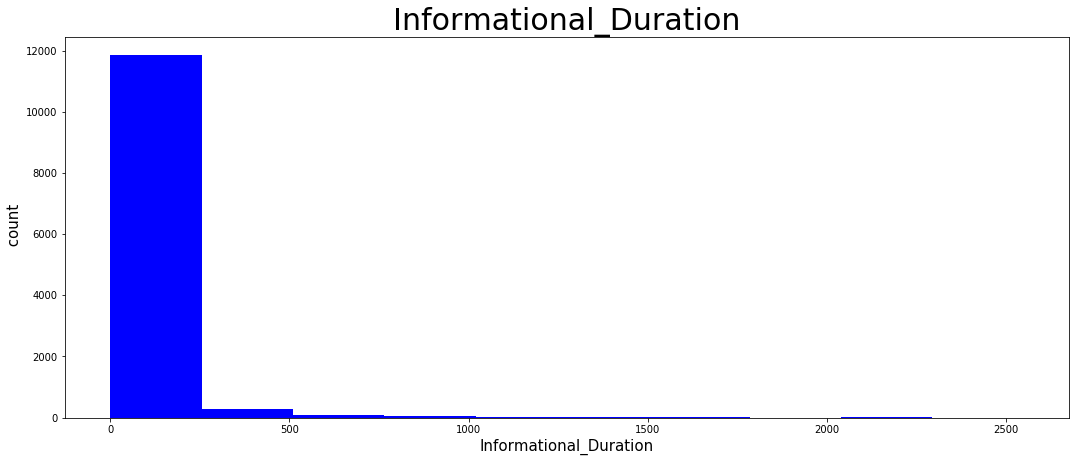

In [57]:
#Distribution of Informational_Duration
plt.hist(df['Informational_Duration'], color = 'blue')
plt.title('Informational_Duration',fontsize = 30)
plt.xlabel('Informational_Duration', fontsize = 15)
plt.ylabel(' count', fontsize = 15)

plt.show()

The informational duration distribution looks very similar to the Administrative duration, with a duration being between 0 and 250 in general.

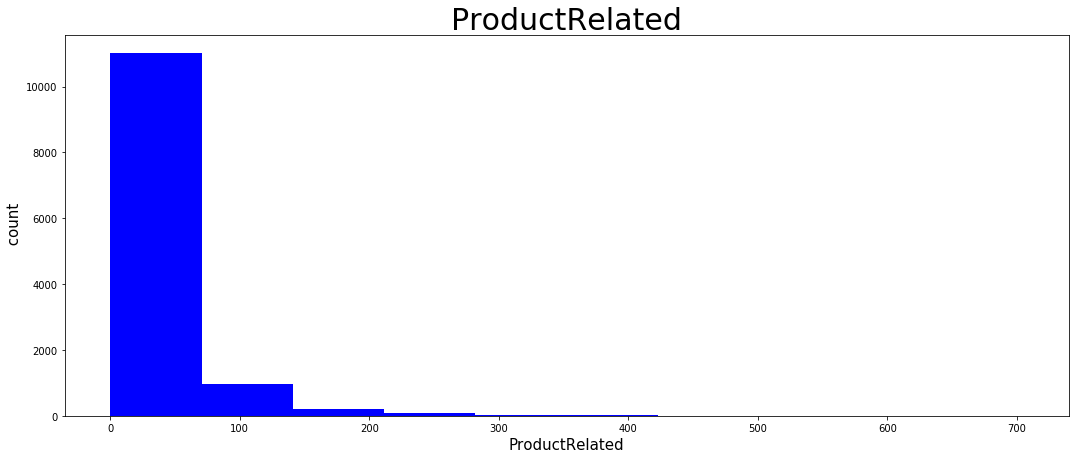

In [58]:
# ProductRelated distribution 
plt.hist(df['ProductRelated'], color = 'blue')
plt.title('ProductRelated',fontsize = 30)
plt.xlabel('ProductRelated', fontsize = 15)
plt.ylabel(' count', fontsize = 15)

plt.show()

 the number of pages of product related that the user visited is mostly between 0 and a litlle bit more that 50.
 Compare to the 2 other type of pages the number are higher.

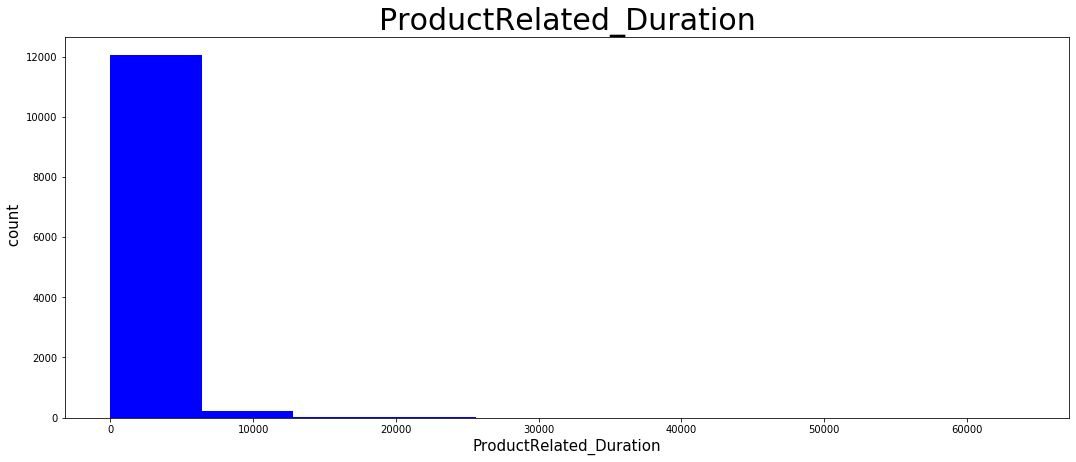

In [59]:
#Distribution of ProductRelated_Duration
plt.hist(df['ProductRelated_Duration'], color = 'blue')
plt.title('ProductRelated_Duration',fontsize = 30)
plt.xlabel('ProductRelated_Duration', fontsize = 15)
plt.ylabel(' count', fontsize = 15)

plt.show()

we can see that for most of the viewers the duration in product related pages is  between 0 and 5000 seconds.

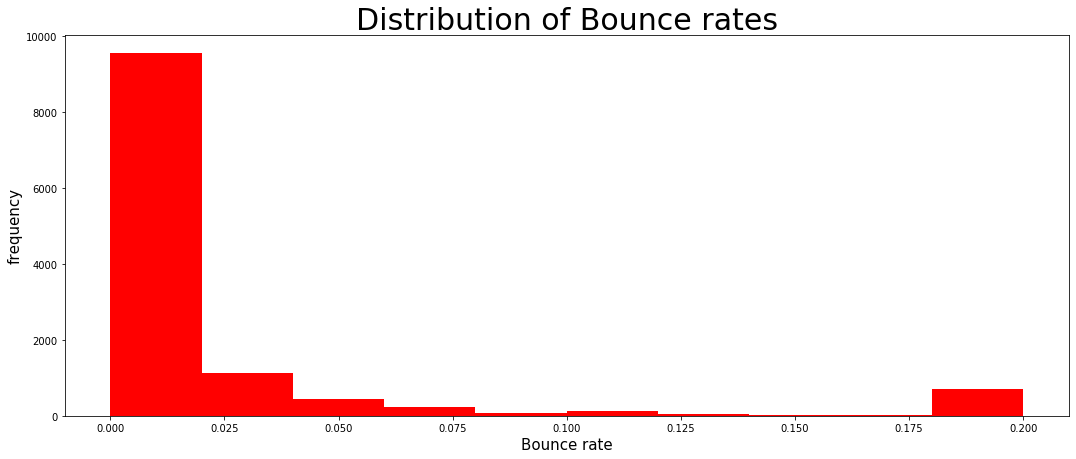

In [60]:
#Distribution of bounce rate 
plt.hist(df['BounceRates'], color = 'red')
plt.title('Distribution of Bounce rates',fontsize = 30)
plt.xlabel('Bounce rate', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)

plt.show()

We can see that the bounce rate are low, which is a good thing since High bounce rates typically indicate that the website is not doing a good job of attracting the continued interest of visitors.Moreover, most  of the bounce rates are less than 0.025 and decrease as the number of bounce rate increase but with an increase for bounce rate between 0.175 and 0.200 values that are closed to the average bounce rate of an e-commerce.

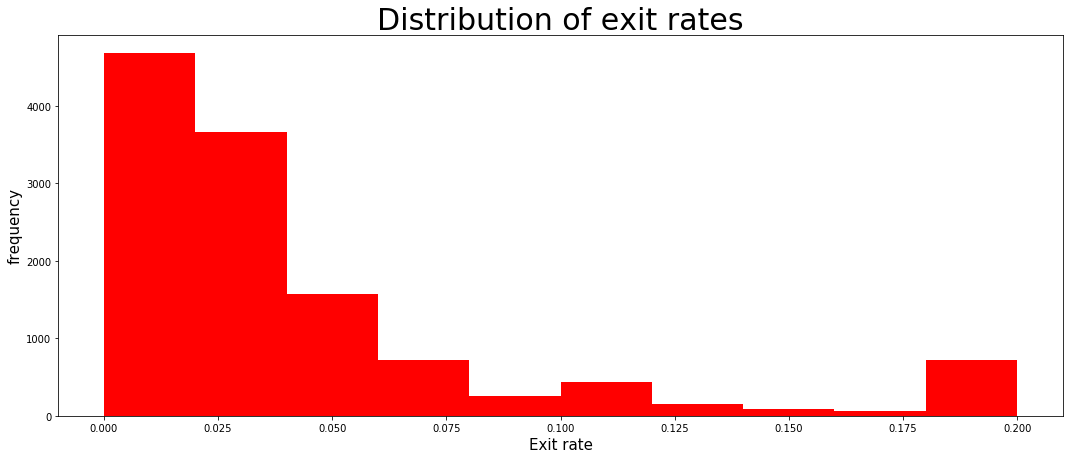

In [61]:
#histogram exit rates 
plt.hist(df['ExitRates'], color = 'red')
plt.title('Distribution of exit rates',fontsize = 30)
plt.xlabel('Exit rate', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)

plt.show()

Most of the exit rates are low less than 0.050

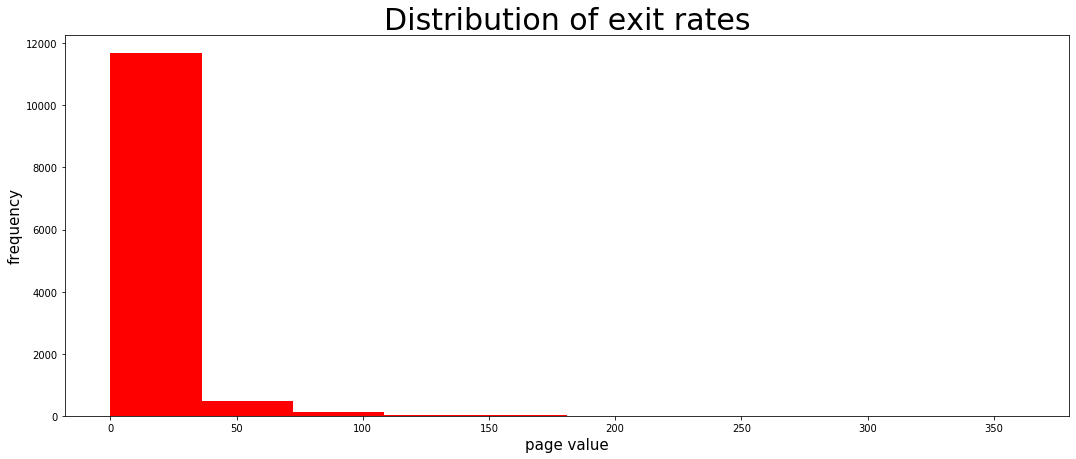

In [62]:
#PageValues Distribution
plt.hist(df['PageValues'], color = 'red')
plt.title('Distribution of exit rates',fontsize = 30)
plt.xlabel('page value', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)

plt.show()

In general the page value is between 0 and 25.Thus, maybe they could do something to improve the value of the pages that are less than 10 for instance.
We can also see that certain pages have a value until a little bit less than 150. The fact that this high value page value are not the majority is realistic since exorbitantly high Page Value,can be the sign of  false positive.

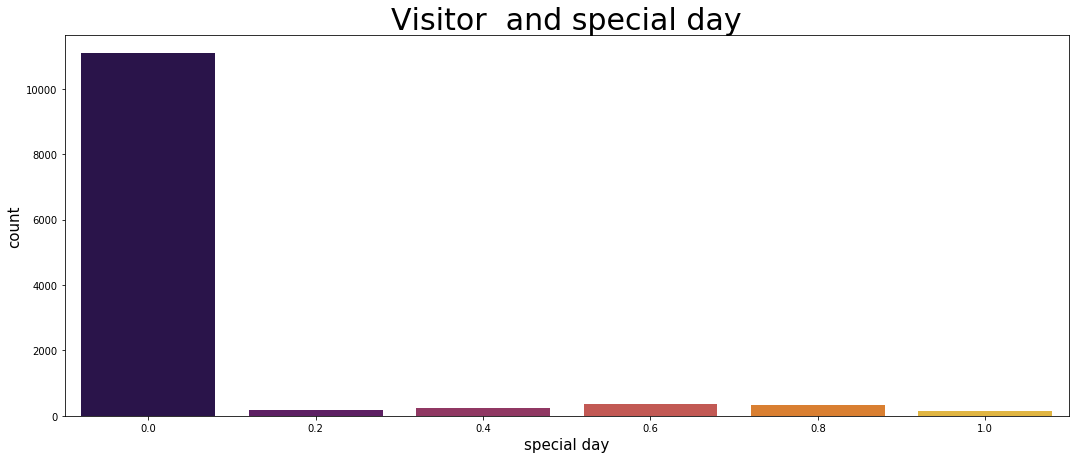

In [63]:
# checking the Distribution of special day 

sns.countplot(df['SpecialDay'], palette = 'inferno')
plt.title('Visitor  and special day', fontsize = 30)
plt.xlabel('special day', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

special day seems to have a small impact on the website visits , seems most of them have a zero value meaning no special day.

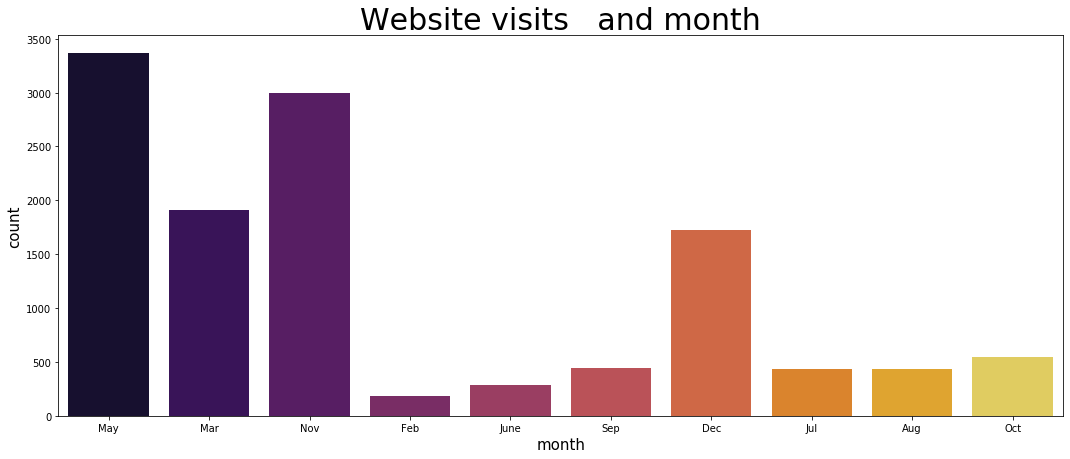

In [64]:
#Distribution of the month
sns.countplot(df['Month'], palette = 'inferno')
plt.title('Website visits   and month', fontsize = 30)
plt.xlabel('month', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

May seems to be the month that has the highest impact followed by november.And February the month that has the smallest impact.
However, We can see that we only have information for 10 months out of 12.January and April are missing this can be an issue and biased the results of the analysis.

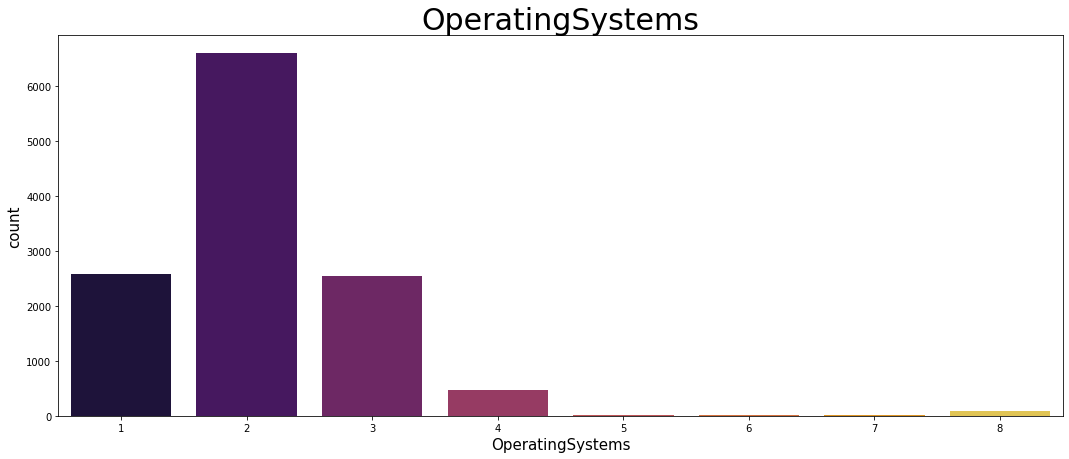

In [65]:
#bar plot OperatingSystems
sns.countplot(df['OperatingSystems'], palette = 'inferno')
plt.title('OperatingSystems', fontsize = 30)
plt.xlabel('OperatingSystems', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()   

Operating system number 2 is the most frequent.

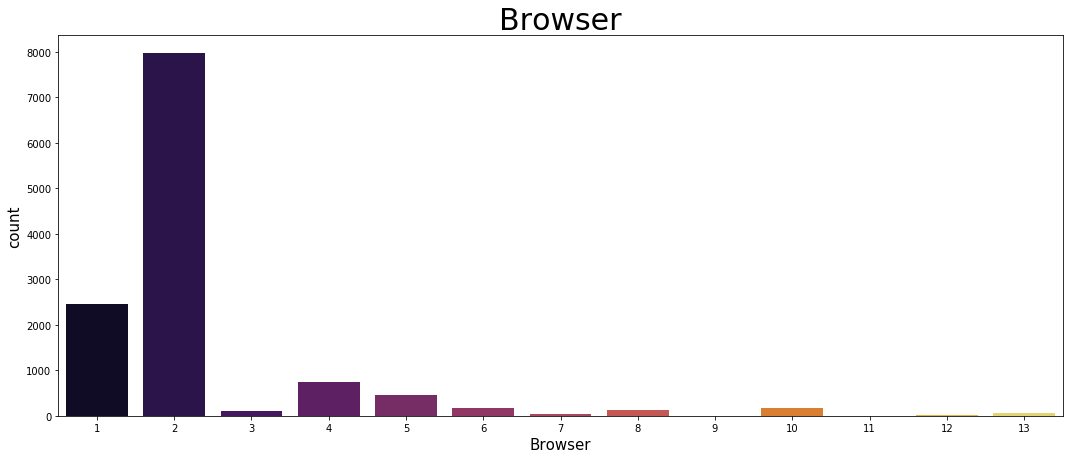

In [66]:
#bar plot Browser
sns.countplot(df['Browser'], palette = 'inferno')
plt.title('Browser', fontsize = 30)
plt.xlabel('Browser', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()   

Out of 13 browser 2 is the most frequent

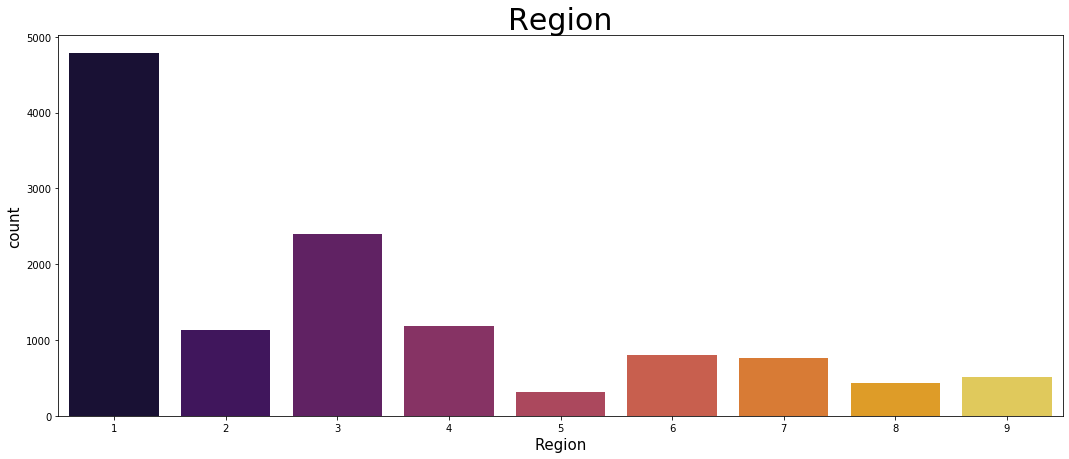

In [67]:
#Region barplot 

sns.countplot(df['Region'], palette = 'inferno')
plt.title('Region', fontsize = 30)
plt.xlabel('Region', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()   

Most of the website visitor are from region 1

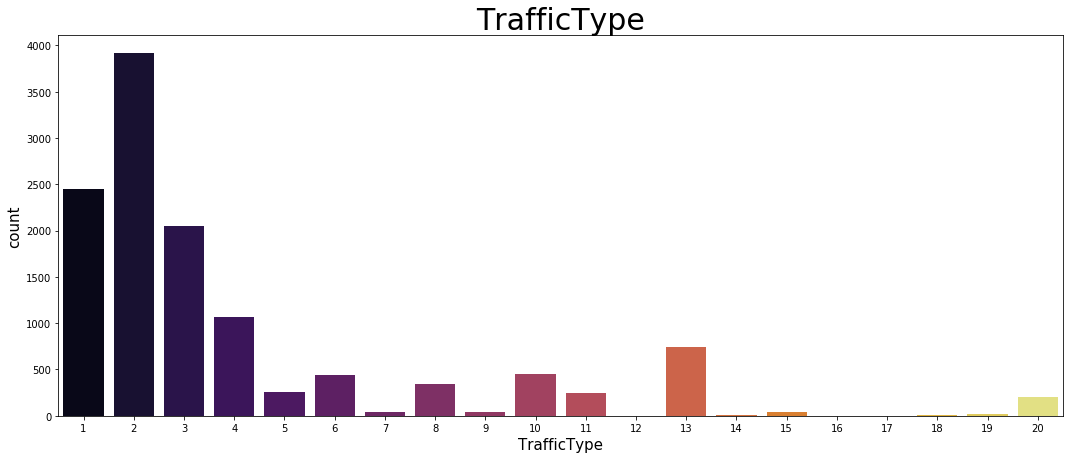

In [68]:
#Traffic type barplot
sns.countplot(df['TrafficType'], palette = 'inferno')
plt.title('TrafficType', fontsize = 30)
plt.xlabel('TrafficType', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()   

The most frequent Traffic type is the number 2.

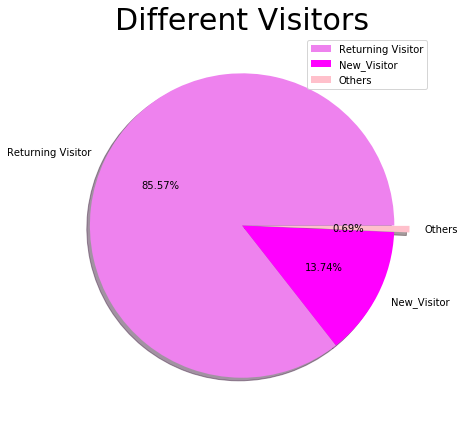

In [69]:
# plotting a pie chart for type of visitors 

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 30)
plt.axis('off')
plt.legend()


From this pie chart we can see that a large majority of the visitors are returning visitor (85.57%)

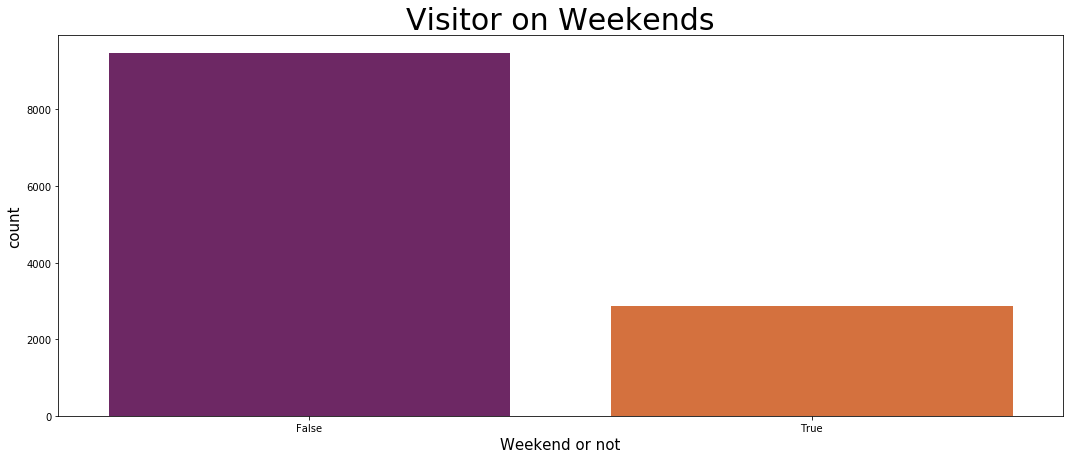

In [70]:
# checking the Distribution of customers on Weekend

sns.countplot(df['Weekend'], palette = 'inferno')
plt.title('Visitor on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

As we can see in this barplot, Weekend does not seem to have an impact on the website's visitor 

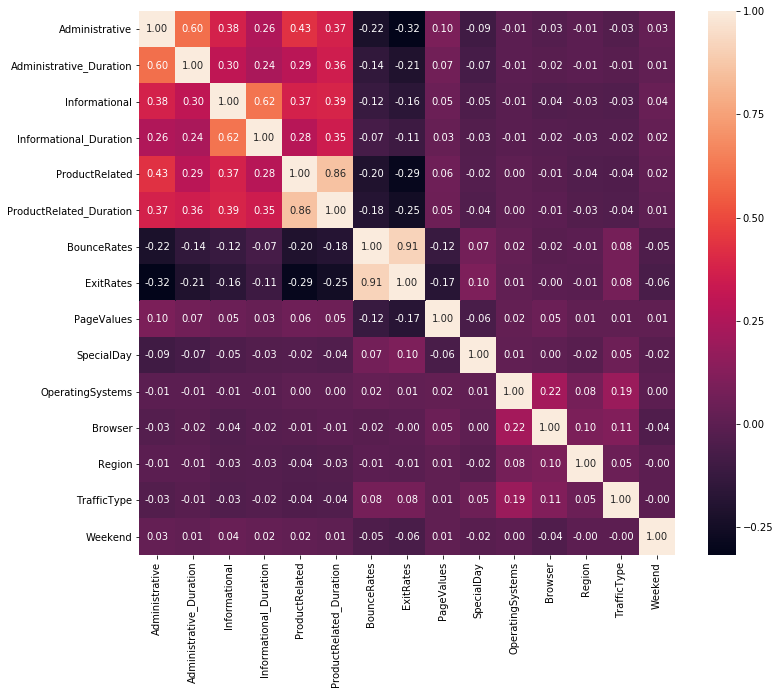

In [71]:
#correlation matrix heatmap
corrMatrix = df.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")

From this correlation matrix we can see that some features are highly positively correlated such as Informational and Informational duration than have a correlation of 0.62, this is not surprising since the 2 variables are related.Same for Administrative and Administrative duration that have a corrrelation of 0.60.Bounce rates and Exit rates have a very high positive correlation of 0.91

# Data preparation

In [72]:
#check if there is null values 
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [73]:
#Check for negative values
df.min()

Administrative                       0
Administrative_Duration              0
Informational                        0
Informational_Duration               0
ProductRelated                       0
ProductRelated_Duration              0
BounceRates                          0
ExitRates                            0
PageValues                           0
SpecialDay                           0
Month                              Aug
OperatingSystems                     1
Browser                              1
Region                               1
TrafficType                          1
VisitorType                New_Visitor
Weekend                          False
dtype: object

As we can see there is no abnormal negatives values 

In the next lines of code we are going to convert the categorical variables into numerical values

In [74]:
#convert weekend into integer 
result = df['Weekend'].astype(int)
df['Weekend'] = result

In [75]:
#Convert 'OperatingSystems','browser','region' and ''TrafficType' into dummies variables and add the dummy columns into the original Data frame
op=pd.get_dummies(df.OperatingSystems, prefix='OperatingSystems')
df = pd.concat([df, op], axis=1)
bro=pd.get_dummies(df.Browser, prefix='browser')
df = pd.concat([df, bro], axis=1)
region=pd.get_dummies(df.Region, prefix='region')
df = pd.concat([df, region], axis=1)
TT=pd.get_dummies(df.TrafficType, prefix='TrafficType')
df = pd.concat([df, TT], axis=1)


In [76]:
#delete the  original columns that has been converted into dummys variable 
del df['OperatingSystems']
del df['Browser']
del df['Region']
del df['TrafficType']
del df['VisitorType']


In [77]:
#Delation of the month variable
del df['Month']

I have decided to delete this columns for 2 reasons.The first one is that as we saw in the EDA with have information only for 10 months out of 12 and no information of why we don't have January and April.
The second reason is that we already have the special day column that is time-sensitive thus I judged that we do not need this 2 columns at the same time.

In [78]:
#Normalization of the data (only the non binary variables) so they have the same scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
scale_cols = ['Administrative', 'Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']
df[scale_cols] = scaler.fit_transform(df[scale_cols])


In [79]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20
0,0.000000,0.000000,0.000000,0.000000,0.011348,0.003470,0.000000,0.142857,0.147816,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.000000,0.000000,0.000000,0.019858,0.016218,0.071429,0.238095,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.148148,0.011033,0.083333,0.032165,0.005674,0.001510,0.000000,0.087500,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.148148,0.034042,0.000000,0.000000,0.022695,0.010245,0.000000,0.060185,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.037037,0.017654,0.041667,0.005884,0.036879,0.010476,0.000000,0.019231,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
5,0.148148,0.012946,0.000000,0.000000,0.127660,0.108670,0.010753,0.075065,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
6,0.333333,0.086696,0.083333,0.038300,0.151773,0.049602,0.015693,0.045610,0.016216,0.0,...,0,0,0,0,0,0,0,0,0,0
7,0.037037,0.000000,0.000000,0.000000,0.028369,0.035496,0.000000,0.119048,0.028283,0.0,...,0,0,0,0,0,0,0,0,0,0
8,0.111111,0.003825,0.000000,0.000000,0.009929,0.001243,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
9,0.259259,0.110149,0.000000,0.000000,0.007092,0.004034,0.022727,0.262626,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


# Hierarchical clustering 

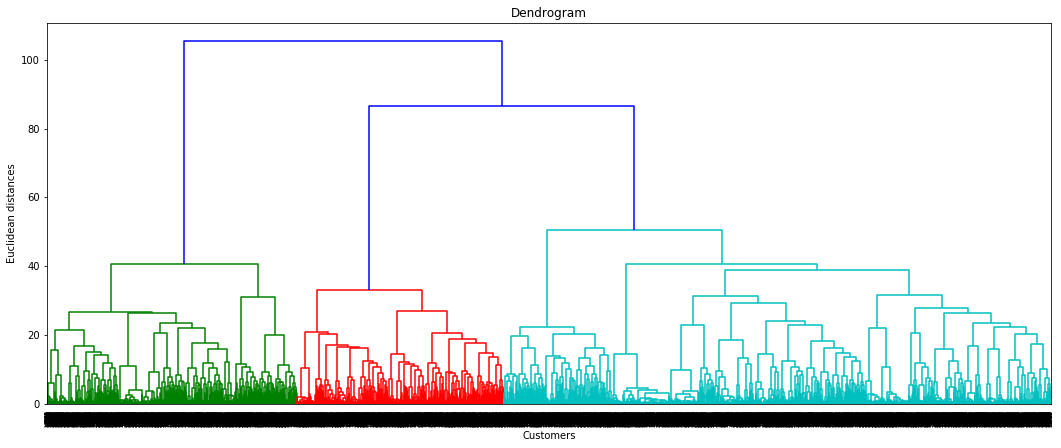

In [80]:
import scipy.cluster.hierarchy as sch
#Lets create a dendrogram variable linkage is actually the algorithm #itself of hierarchical clustering and then in linkage we have to #specify on which data we apply and engage. This is X dataset
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

Based on what the Dendrogram shows I think that 7 clusters should be imposed on the data.

# K-means clustering

In [82]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

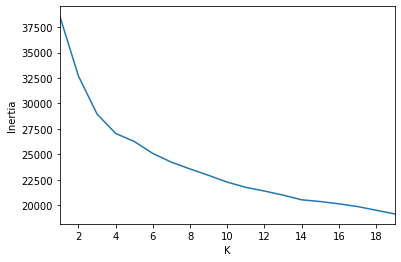

In [85]:
#elbow plot
inertias = []
#i have decided to choose a range from 1 to 20 for the K value 
sizes = range(1, 20)
for k in sizes:
    k2 = KMeans(random_state=42, n_clusters=k)
    k2.fit(df)
    inertias.append(k2.inertia_)
fig, ax = plt.subplots(figsize=(6, 4))
pd.Series(inertias, index=sizes).plot(ax=ax)
ax.set_xlabel("K")
ax.set_ylabel("Inertia")


From this graph 6 seems to an appropriate value for K.This number is in line with the number of clusters selected
from the output of the hierarchical Dendrogram which was 7.

silhouette Plot

In [95]:
from sklearn.metrics import silhouette_score


In [88]:
from sklearn.cluster import KMeans

In [89]:
from sklearn.metrics import silhouette_score

In [101]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(1, 20)]

In [102]:
silhouette_scores = [silhouette_score(df, model.labels_)
                     for model in kmeans_per_k[1:]]


In [103]:
silhouette_scores

[0.1932094567589082,
 0.18116979404679623,
 0.14487203882038382,
 0.12548808325538033,
 0.11958387791250133,
 0.11561927133198195,
 0.1387711265120513,
 0.12435028870664368,
 0.1379684339980691,
 0.14782187202844926,
 0.153042328880089,
 0.15685273657735768,
 0.1578665425850201,
 0.15689607120512034,
 0.15818909828893787,
 0.16063351979193494,
 0.14184795691846566,
 0.1605927123931218]

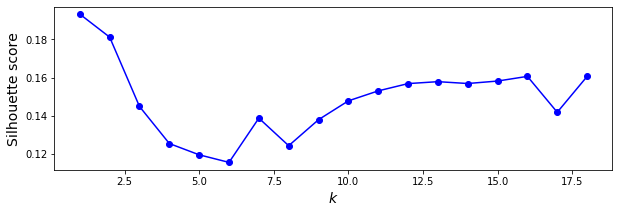

In [104]:
plt.figure(figsize=(10, 3))
plt.plot(range(1, 19), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)


plt.show()

As we can see k=7 seems to be a good value for K,This results is in line  line with the number of clusters selected
from the output of the hierarchical Dendrogram  and the elbow plot.

However, it seems that other values of K that we can not see in this graph are also a good option.
Thus we are going to re-run this code with a greater range.

In [105]:
kmeans_per_k2 = [KMeans(n_clusters=k, random_state=42).fit(df)
                for k in range(1, 30)]

In [108]:
silhouette_scores2 = [silhouette_score(df, model.labels_)
                     for model in kmeans_per_k2[1:]]


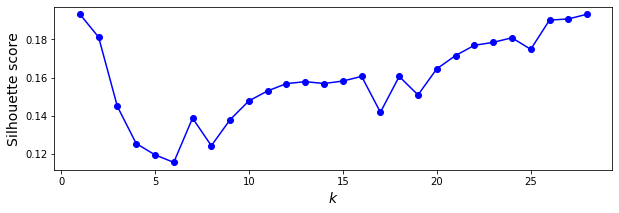

In [109]:
plt.figure(figsize=(10, 3))
plt.plot(range(1, 29), silhouette_scores2, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)


plt.show()

From this we can see that a k value around 17 would also be a good value.

# K-means clustering of K=2

In [110]:
Kmean2 = KMeans(n_clusters=2)
Kmean2.fit(df)

KMeans(n_clusters=2)

In [111]:
Kmean2.cluster_centers_

array([[ 8.74717467e-02,  2.38649738e-02,  2.13886316e-02,
         1.42131558e-02,  4.79348542e-02,  1.99798586e-02,
         1.05173426e-01,  2.09909603e-01,  1.65803376e-02,
         6.39703612e-02,  2.17865596e-01,  2.88154780e-02,
         6.77781208e-01,  2.62838325e-01,  2.04795719e-02,
         6.17474529e-04,  1.95533601e-03,  2.27682456e-18,
         7.51260677e-03,  1.02912422e-04,  8.19285788e-01,
         1.08058043e-02,  7.54348050e-02,  4.75455387e-02,
         1.74951117e-02,  5.04270865e-03, -3.69496100e-16,
         1.02912422e-04,  1.64659874e-02,  6.17474529e-04,
         1.02912422e-03,  6.07183287e-03,  3.79129361e-01,
         9.44736030e-02,  1.91005454e-01,  9.29299166e-02,
         2.88154780e-02,  6.65843367e-02,  6.80251106e-02,
         3.40640115e-02,  4.49727282e-02,  2.10044252e-01,
         3.12853761e-01,  1.44900690e-01,  8.59318720e-02,
         2.04795719e-02,  4.10620562e-02,  3.49902233e-03,
         2.56251930e-02,  2.16116085e-03,  3.46814861e-0

In [112]:
Kmean2.labels_

array([1, 0, 0, ..., 0, 0, 1], dtype=int32)

# EDA on the two groupings and creation of the Revenue column (question 8&9)

In [137]:
#creating a new column Revenue with the 2 grouping 
df['Revenue']=Kmean2.labels_
#subset the data (separate 0 and 1)
df_group0=df.loc[df['Revenue']==0]
df_group1=df.loc[df['Revenue']==1]

In [138]:
df_group0.shape


(9717, 62)

In [139]:
df_group1.shape

(2613, 62)

just looking at the shape we can see that the number of 0 is much greater than the number of 1.We have unbalanced values.

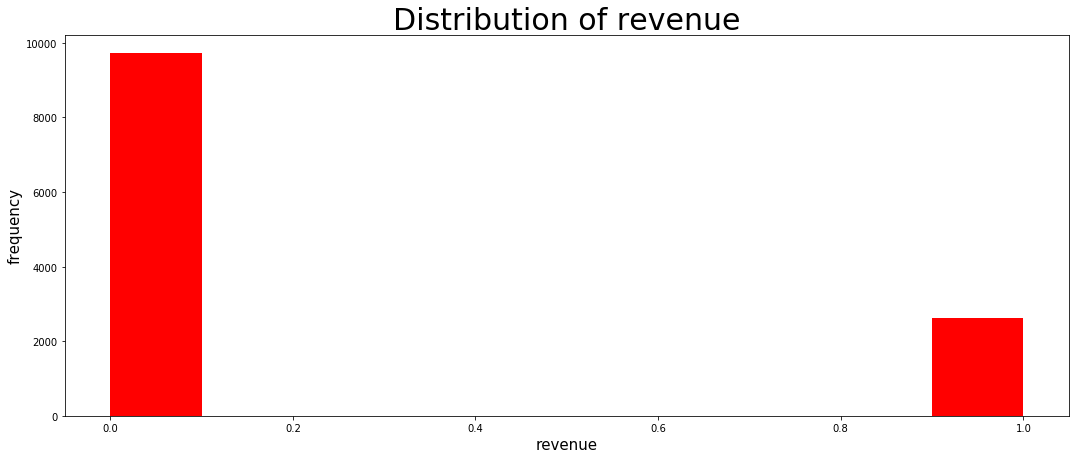

In [128]:
#barplot of revenue
plt.hist(df['Revenue'], color = 'red')
plt.title('Distribution of revenue',fontsize = 30)
plt.xlabel('revenue', fontsize = 15)
plt.ylabel('frequency', fontsize = 15)

plt.show()

we can see that the number of 0 is greater and unbalanced compare to the number of 1.

In [140]:
df_group0.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Revenue
count,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,...,9717.000000,9717.000000,9717.000000,9717.000000,9717.000000,9717.0,9717.000000,9717.000000,9717.000000,9717.0
mean,0.087472,0.023865,0.021389,0.014213,0.047935,0.019980,0.105173,0.209910,0.016580,0.063970,...,0.000103,0.075641,0.001338,0.001338,0.000309,0.0,0.001029,0.001441,0.017392,0.0
std,0.125043,0.052948,0.053749,0.057256,0.066802,0.031848,0.233322,0.235986,0.052031,0.202271,...,0.010145,0.264436,0.036554,0.036554,0.017569,0.0,0.032065,0.037932,0.130734,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.011348,0.003056,0.000000,0.070802,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
50%,0.037037,0.002648,0.000000,0.000000,0.026950,0.010153,0.014286,0.125000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
75%,0.148148,0.026995,0.000000,0.000000,0.056738,0.024518,0.083333,0.243333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0


In [141]:
df_group1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Revenue
count,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,2613.000000,...,2613.0,2613.000000,2613.0,2613.000000,2613.0,2613.000000,2613.0,2613.000000,2613.000000,2613.0
mean,0.079333,0.023459,0.019470,0.010951,0.034129,0.013826,0.132464,0.235647,0.015160,0.051971,...,0.0,0.001148,0.0,0.009568,0.0,0.000383,0.0,0.001148,0.011098,1.0
std,0.115027,0.048387,0.049715,0.046738,0.045118,0.020515,0.272676,0.266471,0.048617,0.185647,...,0.0,0.033871,0.0,0.097363,0.0,0.019563,0.0,0.033871,0.104783,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.008511,0.002321,0.000000,0.072727,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
50%,0.037037,0.000588,0.000000,0.000000,0.019858,0.007226,0.020833,0.134921,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
75%,0.111111,0.029030,0.000000,0.000000,0.042553,0.017526,0.100000,0.263889,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.0
max,0.740741,0.504597,0.500000,0.861113,0.733333,0.422204,1.000000,1.000000,0.682099,1.000000,...,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.0


Looking at the summary statistics, we can see that the fact that it is a 1 or a 0 has a very small impact of the statistics of the variables 

# V_Revenue

In [143]:
#loas the second dataset
df2=pd.read_csv('https://raw.githubusercontent.com/sarahbismuth/p2_data1/master/Project2_Data_Labels.csv')
df2.head()

,Revenue
0,True
1,False
2,False
3,False
4,False


In [144]:
#addind the unique column Revenue of df2 to our original dataset df and call it V_Revenue
df['V_Revenue']=df2['Revenue']

In [146]:
#check that it has been correctly added to df 
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Revenue,V_Revenue
0,0.000000,0.000000,0.000000,0.000000,0.011348,0.003470,0.000000,0.142857,0.147816,0.0,...,0,0,0,0,0,0,0,0,1,True
1,0.000000,0.000000,0.000000,0.000000,0.019858,0.016218,0.071429,0.238095,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,False
2,0.148148,0.011033,0.083333,0.032165,0.005674,0.001510,0.000000,0.087500,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,False
3,0.148148,0.034042,0.000000,0.000000,0.022695,0.010245,0.000000,0.060185,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,False
4,0.037037,0.017654,0.041667,0.005884,0.036879,0.010476,0.000000,0.019231,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,False


In [147]:
#convert V_Revenue into integer 
result = df['V_Revenue'].astype(int)
df['V_Revenue'] = result

In [148]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,Revenue,V_Revenue
0,0.000000,0.000000,0.000000,0.000000,0.011348,0.003470,0.000000,0.142857,0.147816,0.0,...,0,0,0,0,0,0,0,0,1,1
1,0.000000,0.000000,0.000000,0.000000,0.019858,0.016218,0.071429,0.238095,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.148148,0.011033,0.083333,0.032165,0.005674,0.001510,0.000000,0.087500,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.148148,0.034042,0.000000,0.000000,0.022695,0.010245,0.000000,0.060185,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.037037,0.017654,0.041667,0.005884,0.036879,0.010476,0.000000,0.019231,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0


# Comparison of V_Revenue and Revenue columns 

In [149]:
df['Revenue'].value_counts()

0    9717
1    2613
Name: Revenue, dtype: int64

In [150]:
df['V_Revenue'].value_counts()

0    10422
1     1908
Name: V_Revenue, dtype: int64

Looking at the value count we can see that V_Revenue has more 0 values and thus less 1 values than Revenue. This mean that clustering  classified more  visitor  as they made a purchase than the reality.

In [151]:
#looking howq many  row values they have in common 
comp=(df['Revenue']==df['V_Revenue'])

In [152]:
comp.value_counts()

True     8585
False    3745
dtype: int64

They have 8585 equals values 

In [154]:
comp.mean()

0.6962692619626926

The result of the mean, means that 70% Are correctly classified. 

In [156]:
df['V_Revenue'].mean()

0.15474452554744525

In [157]:
df['Revenue'].mean()

0.21192214111922142

Revenue has a higher mean value than V_Revenue, this is due to the fact that V_Revenue has more 0 values 

# Feature selection and training of the data

In [160]:
#INCLUDE Revenevue to the original dataset (without the dummies) to have a better look at the correlation matrix for the feature selection 
df1=pd.read_csv('https://raw.githubusercontent.com/sarahbismuth/p2_data1/master/Project2_Data.csv')
df1['Revenue']=Kmean2.labels_
del df1['Month']

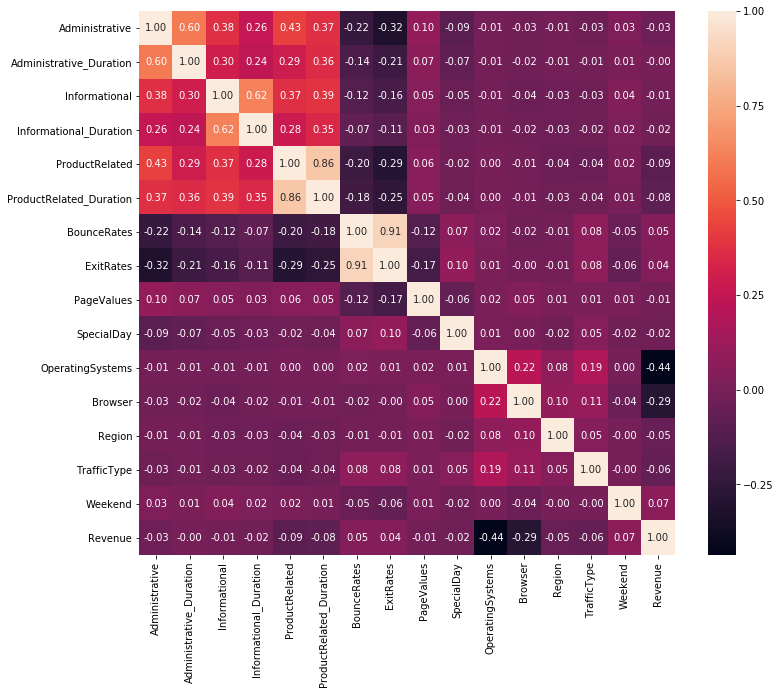

In [161]:
corrMatrix = df1.corr()
plt.figure(figsize=( 12,10))
sns.heatmap(corrMatrix,annot=True,fmt=".2f")

Looking at the correlation Matrix we can see that OperatingSystem and Browser have the highest (negative) correlation Revenue.
Thus they might Be good predictors.

In [162]:
#to go deeper in the feature selction we will use Random Forest 

In [164]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [165]:
#training the data
from sklearn.model_selection import train_test_split
X=df.drop(["Revenue"],1)
y=df['Revenue']

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [166]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 100)

In [168]:
#fit the RandomForest model and drop V_Revenue
forest.fit(x_train.drop(["V_Revenue"],1), y_train)

RandomForestClassifier(random_state=1)

In [169]:
feat_labels = x_train.columns

In [170]:
import numpy as np
all_features=np.array(forest.feature_importances_)
ff=pd.DataFrame(forest.feature_importances_)
ff.describe()

,0
count,61.000000
mean,0.016393
std,0.063903
min,0.000000
25%,0.000183
50%,0.000621
75%,0.002190
max,0.426401


In [171]:
for feature in zip(feat_labels, forest.feature_importances_):
    print(feature)


('Administrative', 0.0013383580022352409)
('Administrative_Duration', 0.0018012980176098522)
('Informational', 0.0006205621533390643)
('Informational_Duration', 0.00085800314692906)
('ProductRelated', 0.003303151440808798)
('ProductRelated_Duration', 0.004450540924305367)
('BounceRates', 0.002189727692559951)
('ExitRates', 0.0025613196841406003)
('PageValues', 0.001340508316033765)
('SpecialDay', 0.0003962923937944573)
('Weekend', 0.0008587007088656091)
('OperatingSystems_1', 0.2052478924222742)
('OperatingSystems_2', 0.08565709404454083)
('OperatingSystems_3', 0.01662303548005709)
('OperatingSystems_4', 0.01159772118632928)
('OperatingSystems_5', 0.00012573660633469907)
('OperatingSystems_6', 0.0001129544701726026)
('OperatingSystems_7', 0.00032080977510333744)
('OperatingSystems_8', 0.0014574377698801226)
('browser_1', 0.4264014739561571)
('browser_2', 0.17052800564154783)
('browser_3', 0.002575245647490135)
('browser_4', 0.011590003781789237)
('browser_5', 0.009602384695591609)
('br

In [172]:
#the threshold correspond the Q3 interquantile range
sfm = SelectFromModel(forest, threshold=0.002190)
sfm.fit(x_train, y_train)
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])


Administrative_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
OperatingSystems_1
OperatingSystems_2
OperatingSystems_3
OperatingSystems_4
browser_1
browser_2
browser_4
browser_5
browser_8
TrafficType_13


We can see that in the features selected we have the 2 features (browser and Operating System )that had a high correlation in the corr matrix.
Moreover 3 of the 8 features selected are dummies,However I think that using only some dummies of a variable will bias our results, thus we will use all the dummies column for each of the 3 variables (browser,TrafficType and OperatingSystem)

# SVM models

In [173]:
#model 1 is all 8 features (x1)
 
x1_train=x_train[['Administrative_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','OperatingSystems_1',
'OperatingSystems_2',
'OperatingSystems_3',
'OperatingSystems_4',
'OperatingSystems_5',
'OperatingSystems_6',
'OperatingSystems_7',
'OperatingSystems_8',
'browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13',
'TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20'              
]]
x1_test=x_test[['Administrative_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','OperatingSystems_1',
'OperatingSystems_2',
'OperatingSystems_3',
'OperatingSystems_4',
'OperatingSystems_5',
'OperatingSystems_6',
'OperatingSystems_7',
'OperatingSystems_8',
'browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13',
'TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20'              
]]

In [174]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import sklearn.metrics as metrics

In [175]:
#this list all of the classifiers SVM that will be run on both models 
classifiers = [
    SVC(kernel="linear"),
    SVC(kernel = "rbf")
    ]
#this is training model 1
classifiers_fit1=[]
for i,classifier in enumerate(classifiers):
   
    classifiers_fit1.append(classifier.fit(x1_train,y_train))

In [176]:
#this function will allow to have all the metrics features of the different model in one table 
def results(my_list,test_set):
    results_df=pd.DataFrame()
    results_df['metric']=['accuracy','precision','f1','recall']
    for i,classifier in enumerate(my_list):
        predictor=classifier.predict(test_set)
        results_df[i+1] = [metrics.accuracy_score(y_test,predictor),metrics.precision_score(y_test,predictor),metrics.f1_score(y_test,predictor),metrics.recall_score(y_test,predictor)]
    print(results_df)

In [177]:
results(classifiers_fit1,x1_test)

      metric    1    2
0   accuracy  1.0  1.0
1  precision  1.0  1.0
2         f1  1.0  1.0
3     recall  1.0  1.0


We can see that all the metric being 1, the model is "perfect".
This model is clearly overfitted and verey unlikely to happen in real life 

In [196]:
#we are concern about overfiting in the first model, we are going to remove browser because we are concern with multicolinearity with operating system we chose to keep operating system because it has highest corr with revenue.
#We are also going to remove TrafficType since it has a corr of 0.19 with OperatingSystem
#WE remove 'Administrative_Duration' because it has no correlation with the response variable 
x2_train=x1_train.drop(['browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13','TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20','Administrative_Duration' ],1)
x2_test=x1_test.drop(['browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13','TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20','Administrative_Duration' ],1)
                   

In [194]:
#this is training model 2
classifiers_fit2=[]
for i,classifier in enumerate(classifiers):
   
    classifiers_fit2.append(classifier.fit(x2_train,y_train))

In [195]:
results(classifiers_fit2,x2_test)

      metric         1         2
0   accuracy  0.964315  0.964315
1  precision  0.864895  0.864895
2         f1  0.922078  0.922078
3     recall  0.987358  0.987358


We can see that there is no difference between model 1 and 2 of the SVM model 2

In [199]:
#Finally I have decided to run a model with only 1 feature which is Operating system(IT HAS THE HIGHEST CORR WITH REVENUE)
x3_train=x1_train.drop(['browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13','TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20','Administrative_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates' ],1)

x3_test=x1_test.drop(['browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13','TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20','Administrative_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates' ],1)



In [184]:
#this is training model 3
classifiers_fit3=[]
for i,classifier in enumerate(classifiers):
   
    classifiers_fit3.append(classifier.fit(x3_train,y_train))

In [185]:
results(classifiers_fit3,x3_test)

      metric         1         2
0   accuracy  0.964315  0.964315
1  precision  0.864895  0.864895
2         f1  0.922078  0.922078
3     recall  0.987358  0.987358


# Best Model

I have decided to choose model 2.
The first reason is that I can not choose model 1 due to the overfitting, Model 2 and 3 have the same results metrics with an accuracy  of 0.96, a high f1 score of 0.92 and a recall of 0.98 which are really good results.
However, I think it is too risky for the future when the websites will have other values to choose a model with only one feature to predict the response variable.
For these reasons I think that model 2 is my best model.

Cross Validation:

In [197]:
X1=df[['Administrative_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','OperatingSystems_1',
'OperatingSystems_2',
'OperatingSystems_3',
'OperatingSystems_4',
'OperatingSystems_5',
'OperatingSystems_6',
'OperatingSystems_7',
'OperatingSystems_8',
'browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13',
'TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20'  ]]

In [200]:
X3=X1.drop(['browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13','TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20','Administrative_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates' ],1)


In [201]:
X2=X1.drop(['browser_1','browser_2','browser_3','browser_4','browser_5','browser_6','browser_7','browser_8','browser_9','browser_10','browser_11','browser_12','browser_13','TrafficType_1','TrafficType_2','TrafficType_3','TrafficType_4','TrafficType_5','TrafficType_6','TrafficType_7','TrafficType_8',
'TrafficType_9','TrafficType_10','TrafficType_11','TrafficType_12','TrafficType_13' ,'TrafficType_14','TrafficType_15','TrafficType_16' ,'TrafficType_17',
'TrafficType_18','TrafficType_19','TrafficType_20','Administrative_Duration'],1)

In [202]:
#cross validation SVM model 1
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X1, y, cv=5)


In [203]:
print(scores)
print(scores.mean())

[1.         0.99918897 1.         0.99959448 1.        ]
0.9997566909975669


In [204]:
#cross validation SVM model 2
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X2, y, cv=5)


In [205]:
print(scores)
print(scores.mean())

[0.95782644 0.9541768  0.96188159 0.96512571 0.95782644]
0.959367396593674


In [206]:
#cross validation SVM model 2
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, X3, y, cv=5)


In [207]:
print(scores)
print(scores.mean())

[0.95782644 0.9541768  0.96188159 0.96512571 0.95782644]
0.959367396593674


In [208]:
#apply the model to the testing data
classifiers = [
    SVC(kernel = "rbf")
    ]
#this is testing 
classifiers_fit4=[]
for i,classifier in enumerate(classifiers):
   
    classifiers_fit4.append(classifier.fit(x2_test,y_test))


In [210]:
results(classifiers_fit4,x2_test)

      metric         1
0   accuracy  0.964315
1  precision  0.864895
2         f1  0.922078
3     recall  0.987358


The results look good wuth a high accuracy,f1 and recall scores

# comparison of the predicted values for the Revenue attribute from the testing data set to the corresponding values of the V_Revenue variable

In [211]:
#define model 2 as the pred revenue, and look at the value 
pred_revenue=classifiers_fit2[0].predict(x2_test)
pred_revenue

array([1, 1, 0, ..., 1, 0, 0], dtype=int32)

In [214]:
#look at the value of the testing V_Revenue
V_Revenue=x_test['V_Revenue']

In [215]:
V_Revenue

10987    0
11878    0
11127    0
2486     0
392      0
2148     0
245      1
10406    0
285      0
3422     0
6988     0
7239     0
11231    0
12153    0
209      0
6093     0
4938     0
10770    0
1954     0
4846     0
3559     0
12144    0
6486     0
7995     0
4265     0
99       0
1600     0
7007     0
3268     0
3009     0
        ..
6443     1
3462     0
6472     0
3439     0
6747     0
6539     0
6573     0
1891     0
6938     0
6423     1
7451     0
2822     0
6728     0
4114     0
7139     0
12280    0
8970     0
3012     0
1432     1
9533     1
9634     0
4480     0
8236     0
11722    0
9284     1
4456     0
6218     0
6934     0
4396     0
8140     0
Name: V_Revenue, Length: 3699, dtype: int64

In [216]:

def result2(my_array,test_set):
    results_df=pd.DataFrame()
    results_df['metric']=['accuracy','precision','f1','recall']
    
        
    results_df [1]= [metrics.accuracy_score(V_Revenue,pred_revenue),metrics.precision_score(V_Revenue,pred_revenue),metrics.f1_score(V_Revenue,pred_revenue),metrics.recall_score(V_Revenue,pred_revenue)]
    print(results_df)

In [217]:
result2(pred_revenue,V_Revenue)

      metric         1
0   accuracy  0.670992
1  precision  0.137320
2         f1  0.169283
3     recall  0.220641


The accuracy score is not bad with a score of 0.67.
However the other metrics results are not good and low.
Thus i think that another model could  better matvh  the SVM model derived from the results of the  clustering work to the actual V_Revenue classifications

# Conclusion

I have generated a Revenue with the use clustering method. Created 3 different SVM models that were derived from my previous clustering method and compare my favorite model to the actual V_Revenue.
The results of this work could help  online retailers to understand what they need to improove to increase their revenue and what can predict their revenue.